# Linear Regression

We'll explore how machine learning can be used to make inferences using a technique called Linear Regression.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Features and Outputs

Let's first play around with linear regression by hand. We can use numpy to generate a set of $x$ and $y$ values. This is synthetic data, but we could imagine that it represents a set of observations about temperature (our input feature) and the number of people in a park (our output feature, which we would like to eventually predict).

We could imagine, for example, that the $x$ value of each point is the outdoor temperature, and the $y$ value is the number of people that we observe in a public park.

In [3]:
points = np.asarray([(10,20), (15,40), (30,90), (32,88), (5,10), (2,3), (6,5), (20,70), (22,75), (18,50)])

We can plot these points using matplotlib, as below.

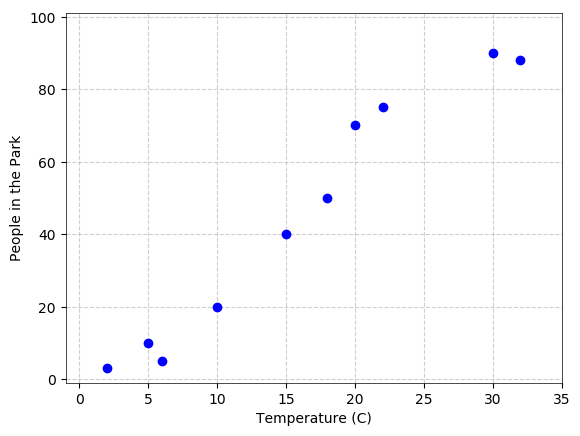

In [4]:
plt.plot(points[:,0], points[:,1], '.', color='blue', markersize=12)
plt.grid(linestyle='--', alpha=0.6)
plt.xlabel('Temperature (C)')
plt.ylabel('People in the Park')
plt.xlim((-1,35))
plt.ylim((-1,101))
plt.show()

## Linear Regression by Hand

Now suppose that we want to draw a line that goes through the middle of the collection of points with minimal distance between the line and each point along the y-axis. The equation for a line is $y=mx+b$, where $m$ is the slope of the line and $b$ is the $y$-intercept. The following code plots a line in addition to the points from before. Change the values of $m$ and $b$ to find a line with the smallest total distance to the points. 

You can also see how the error, measured as residual sum of squares (RSS), varies when you change the m and b values. Your search for good values does not equate to a closed form solution for the optimal m and b values (one exists in this case, and it is easily computable), but your search is informally what a search-based optimization might do.

RSS Error: 79.0000


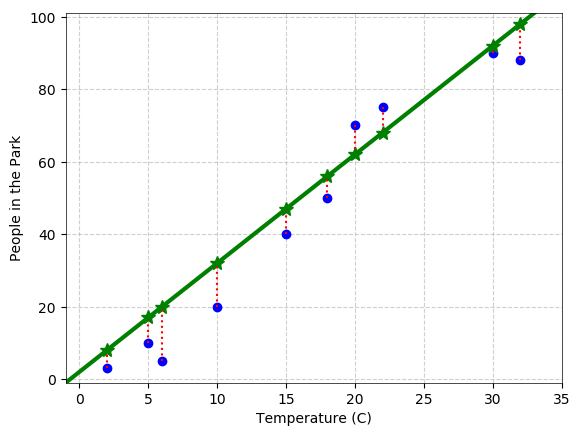

In [8]:
# Play with these two values!
m = 3
b = 2

# Calculate the distances from the line to the points

# x and y values of the points
points_x, points_y = points[:,0], points[:,1] 

# y values of the line at the x values of the points
line_y = m * points_x + b                     

# Compute Error
distances = np.sqrt((points_y - line_y)**2)   # distances from y values of the points to y values of the line
total_distance = np.sum(distances)            # sum of the distances
print("RSS Error: {:.4f}".format(total_distance))

# Plot the line and points
plt.plot(points_x, points_y, '.', color='blue', markersize=12)
plt.plot(points_x, line_y, '*', color='green', markersize=10)
for px, py, ly in zip(points_x, points_y, line_y):
    plt.plot([px, px], [py, ly], ':', color='red', linewidth=1.5)
plt.plot([-2, 35], np.array([-2,35])*m + b, '-', color='green', linewidth=3)
plt.grid(linestyle='--', alpha=0.6)

plt.xlabel('Temperature (C)')
plt.ylabel('People in the Park')
plt.xlim((-1,35))
plt.ylim((-1,101))

plt.show()

Congratulations! You've done linear regression by hand! 

## Linear Regression in Python/Scikit-Learn

Fortunately, there are Python functions which will find the best line for us, so we don't have to do it manually.
The following code plots the points, your line in green, and the optimal line determined by the Python LinearRegression function in red. 

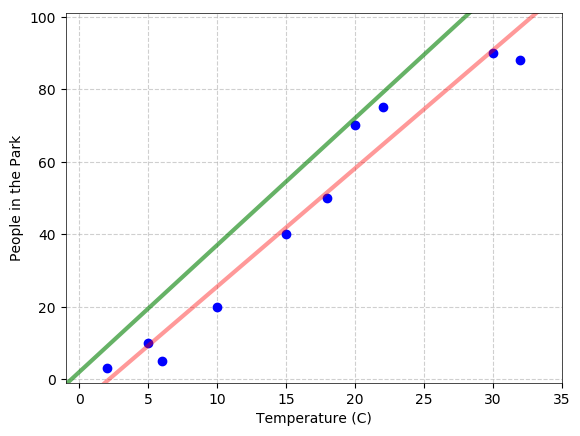

In [6]:
# Import the linear models from scikit-learn
from sklearn import linear_model

# Fit the linear regression
linear_regression = linear_model.LinearRegression()

# Training
linear_regression.fit(points_x.reshape(-1,1), points_y)

# Prediction: Input to predict function are x values that the model has never seen.
best_line_ys = linear_regression.predict(np.array([-2,35]).reshape(-1,1))

# Plot the results along with the points and previous line
# Plot the original points.
plt.plot(points_x, points_y, '.', color='blue', markersize=12)

# Manual Linear Regression from before is in green.
plt.plot([-2, 35], np.array([-2,35])*m + b, '-', color='green', linewidth=3, alpha=0.6)

# Predicted line from sklearn is in red
plt.plot([-2, 35], best_line_ys, color='red', alpha=0.4, linewidth=3)

plt.grid(linestyle='--', alpha=0.6)

plt.xlabel('Temperature (C)')
plt.ylabel('People in the Park')
plt.xlim((-1,35))
plt.ylim((-1,101))

plt.show()